**Projeto Python para Análise de Dados**

 Trata-se da análise dos dados de crédito de uma instituição financeira, onde o objetivo principal é compreender os fatores que influenciam a inadimplência dos clientes. Visando investigar os padrões e comportamentos que levam um cliente deixar de honrar suas dívidas.

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/kaggle/input/default/Python_M10_support material.csv', na_values = 'na')
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


**Exploração de Dados**

In [4]:
df.shape

(10127, 16)

In [5]:
df[df['default']==0].shape

(8500, 16)

In [6]:
df[df['default']==1].shape

(1627, 16)

In [7]:
qtd_total, _ = df.shape 
qtd_adimplentes, _ = df[df['default'] == 0].shape 
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [8]:
print(f"A proporção clientes adimplentes é de " + f"{round(100 * qtd_adimplentes/ qtd_total, 2)}%" ) 
print(f"A proporção clientes inadimplentes é de " + f"{round(100 * qtd_inadimplentes/ qtd_total, 2)}%" )

A proporção clientes adimplentes é de 83.93%
A proporção clientes inadimplentes é de 16.07%


In [9]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [12]:
df.drop('id',   axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [13]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [14]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [16]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []
    total_linhas = df.shape[0]

    for col in df.columns:
        qtd_faltantes = df[col].isna().sum()
        if qtd_faltantes > 0:
            porcentagem_faltantes = round((qtd_faltantes / total_linhas) * 100, 2)
            dict_dados_faltantes = {
                'coluna': col,
                'quantidade': qtd_faltantes,
                'porcentagem': porcentagem_faltantes
            }
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)

In [17]:
stats_dados_faltantes(df=df)

{'coluna': 'escolaridade', 'quantidade': 1519, 'porcentagem': 15.0}
{'coluna': 'estado_civil', 'quantidade': 749, 'porcentagem': 7.4}
{'coluna': 'salario_anual', 'quantidade': 1112, 'porcentagem': 10.98}


In [18]:
stats_dados_faltantes(df=df[df['default'] ==  0])

{'coluna': 'escolaridade', 'quantidade': 1263, 'porcentagem': 14.86}
{'coluna': 'estado_civil', 'quantidade': 620, 'porcentagem': 7.29}
{'coluna': 'salario_anual', 'quantidade': 925, 'porcentagem': 10.88}


In [19]:
stats_dados_faltantes(df=df[df['default'] ==  1])

{'coluna': 'escolaridade', 'quantidade': 256, 'porcentagem': 15.73}
{'coluna': 'estado_civil', 'quantidade': 129, 'porcentagem': 7.93}
{'coluna': 'salario_anual', 'quantidade': 187, 'porcentagem': 11.49}


**Limpeza e Transformação**

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [21]:
df[['limite_credito',  'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [22]:
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']

valores_limpos = list(map(lambda valor: float(valor.replace(".", "").replace(",", ".")), valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [24]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(str(valor).replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(str(valor).replace(".", "").replace(",", ".")))

In [25]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [26]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [27]:
df.drop('id',   axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
limite_credito,10127.0,790537.876864,899006.110169,14380.0,221366.5,383867.0,992867.5,3451699.0
valor_transacoes_12m,10127.0,403631.204997,345201.246887,6026.0,180433.5,360275.0,465467.0,1848493.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(7081, 16)

In [31]:
df[df['default'] == 0].shape

(5968, 16)

In [32]:
df[df['default'] == 1].shape

(1113, 16)

In [34]:
qtd_total_novo, _ = df.shape 
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape 
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [35]:
print(f"A proporção de adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporção de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporção de adimplentes ativos é de 83.93%
A nova proporção de clientes adimplentes é de 84.28%

A proporção de clientes inadimplentes é de 16.07%
A nova proporção de clientes inadimplentes é de 15.72%


**Etapa de Análises**

In [36]:
df_adimplente = df[df['default'] == 0]


In [37]:
df_inadimplente = df[df['default'] == 1]

In [38]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


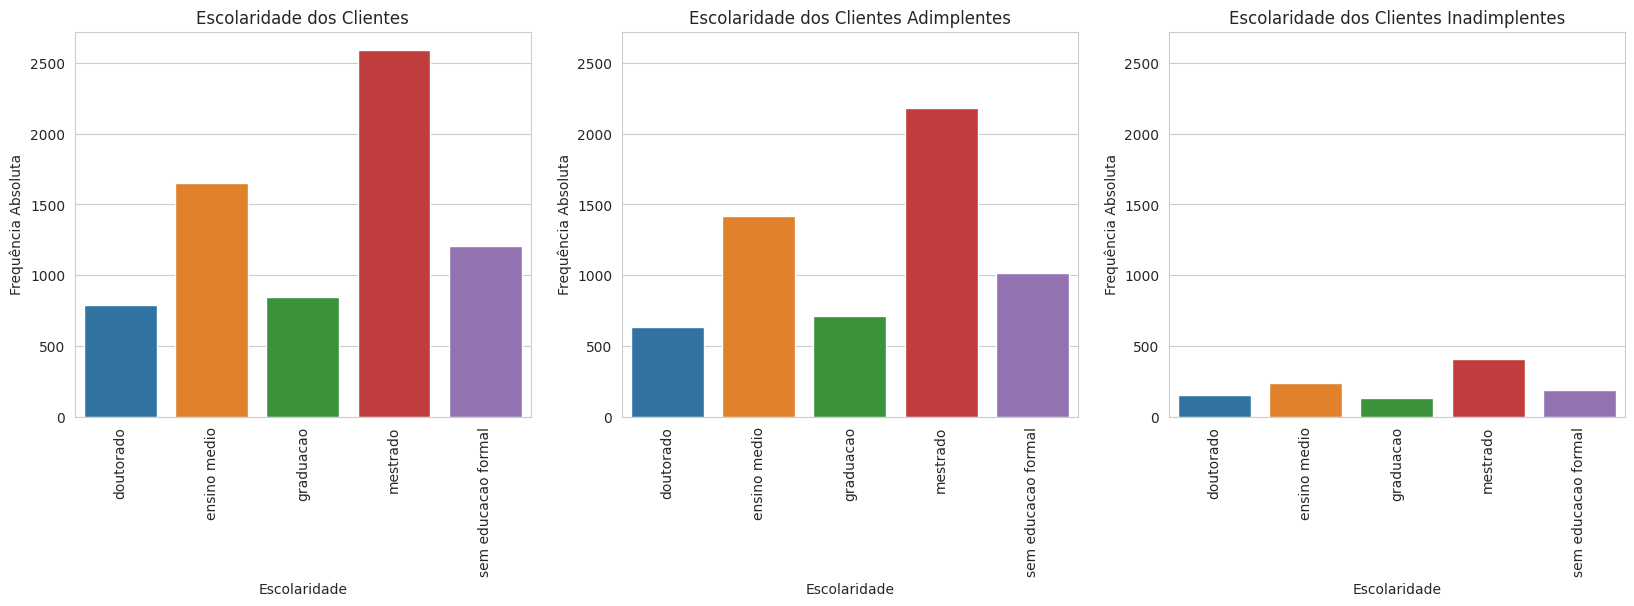

In [39]:
coluna = "escolaridade"
titulos = [
    "Escolaridade dos Clientes",
    "Escolaridade dos Clientes Adimplentes",
    "Escolaridade dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

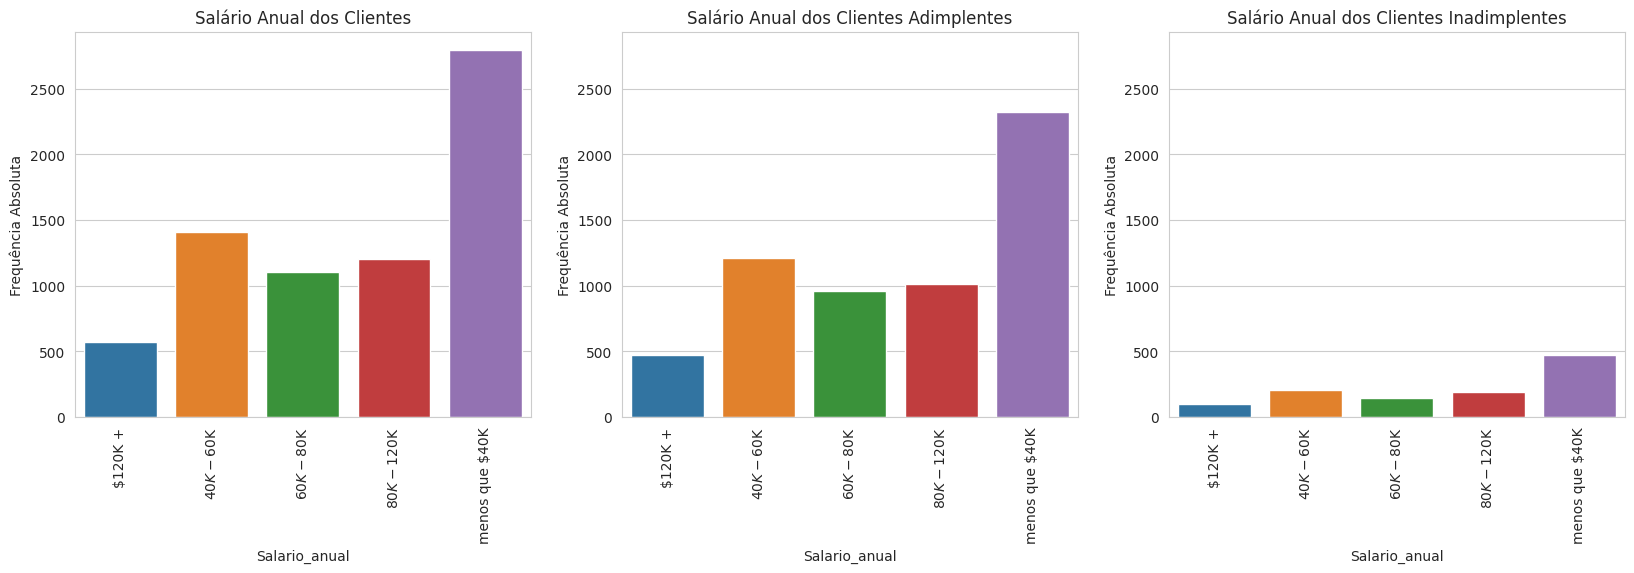

In [40]:
coluna = "salario_anual"
titulos = [
    "Salário Anual dos Clientes",
    "Salário Anual dos Clientes Adimplentes",
    "Salário Anual dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

In [41]:
df.drop(['id',  'default'],  axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,1269151.0,11449.0,42
1,49,5,44,6,2,1,825696.0,129145.0,33
2,51,3,36,4,0,1,341856.0,188772.0,20
4,40,3,21,5,0,1,471622.0,81608.0,28
5,44,2,36,3,2,1,401069.0,108807.0,24


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


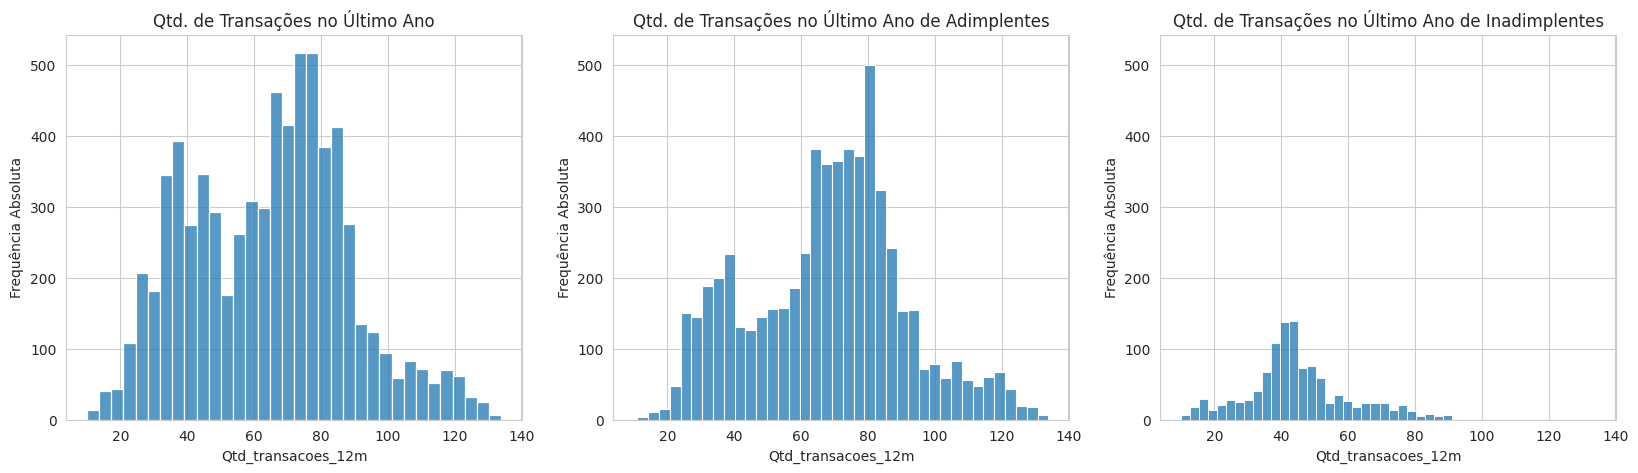

In [43]:
coluna = 'qtd_transacoes_12m'
titulos = [
    'Qtd. de Transações no Último Ano',
    'Qtd. de Transações no Último Ano de Adimplentes',
    'Qtd. de Transações no Último Ano de Inadimplentes'
]

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


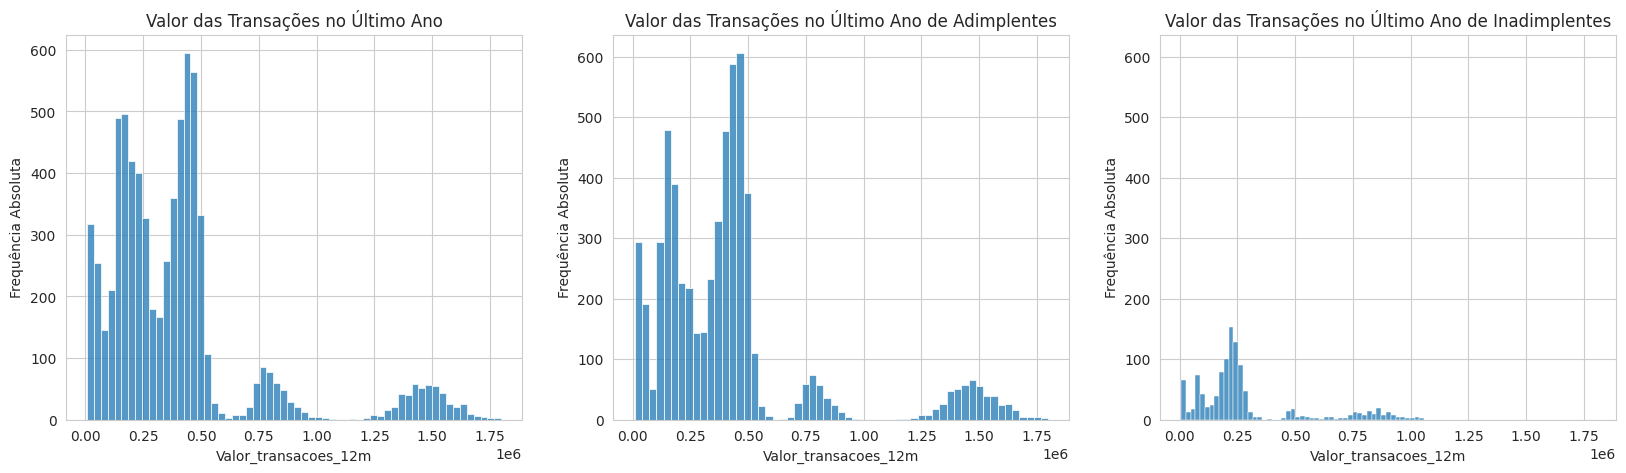

In [48]:
coluna = 'valor_transacoes_12m'
titulos = [
    'Valor das Transações no Último Ano',
    'Valor das Transações no Último Ano de Adimplentes',
    'Valor das Transações no Último Ano de Inadimplentes'
]

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

plt.show()

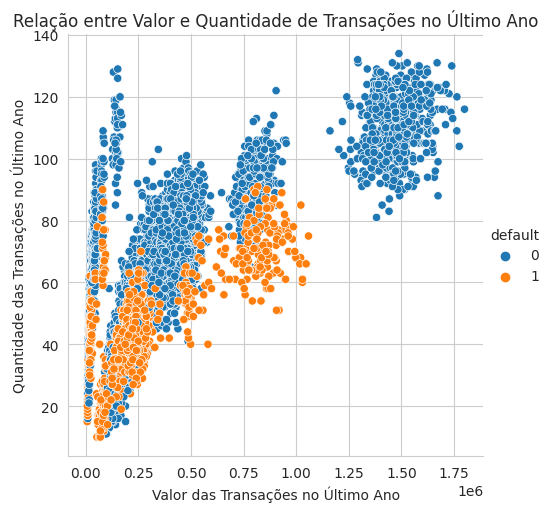

In [49]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')

_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'

)

plt.show()

**Insight Gerado**

Com base na análise dos dados, podemos observar que os grupos de inadimplentes estão mais concentrados em duas faixas específicas:

Faixa 1: Concentra-se em valores de transações menores, na faixa de 0 a 5.000,00, e quantidade de transações variando de 20 a 80.

Faixa 2: Apresenta valores de transações mais elevados, na faixa de 6.000,00 a 10.000,00, e uma quantidade de transações mais restrita, variando de 60 a 80.

Esse insight sugere que os inadimplentes estão mais presentes em dois cenários distintos: aqueles com valores menores de transações e uma quantidade moderada a alta de transações, e aqueles com valores mais elevados de transações, mas uma quantidade de transações mais restrita, indicando um possível padrão de comportamento diferenciado entre os grupos.

Essa análise pode ser útil para a instituição financeira direcionar estratégias específicas de gerenciamento de risco e prevenção de inadimplência, como revisão de políticas de concessão de crédito, monitoramento mais rigoroso de clientes em potencial situações de risco e desenvolvimento de medidas de suporte para grupos com características específicas de comportamento financeiro.


